Check the distribution of images. Ideally, we want to have at least 128x128 resolution. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8700246/

According to this paper, a model trained on lower resolution works well on low and high resolutions. Low resolutions is 32x32. However, if the model is trained on high resolution, it will suffer in performance when tested on low resolution. There is about an 8-10% increase in accuracy going from 32x32 to 512x512 on the training data. Most of that increase comes from going to 64x64 or 128x128 resolution. There is little gain afterwards, so setting an upper limit and lower limit is ideal. Most images are not in the same resolution, given images are cropped for training, so you will have a range of images between your upper and lower bounds. An ideal example is 64x64 to 512x512 for models that have higher processing. Higher resolution images will slow model training. For less resources, ideally 64x64 to 128x128 is good.

Additionally, we want the model to be trained on a consistent set of resolutions to better control our models outputs, given these are blackboxes.

**More Details**: https://chat.openai.com/share/2651052b-0154-47b8-8f8d-07474ab6c4d6

In [1]:
import os
from PIL import Image

def count_images_by_resolution(root_folder, width_threshold_64, height_threshold_64, width_threshold_256, height_threshold_256):
    count_above_64x64 = 0
    count_above_256x256 = 0
    count_under_64x64 = 0
    total_count = 0

    for folder_name, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                file_path = os.path.join(folder_name, file)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        if width > width_threshold_256 and height > height_threshold_256:
                            count_above_256x256 += 1
                        elif width > width_threshold_64 and height > height_threshold_64:
                            count_above_64x64 += 1
                        else:
                            count_under_64x64 += 1
                        total_count += 1
                except (IOError, OSError, Image.DecompressionBombError):
                    # Skip files that PIL can't open or process
                    pass

    return count_above_64x64, count_above_256x256, count_under_64x64, total_count

# Provide the root folder path where you want to search for images
root_folder_path = r'C:\Important Files\Python Projects\Facial Emotion Recognition\FER-2013\dataset'
count_above_64x64, count_above_256x256, count_under_64x64, total_count = count_images_by_resolution(root_folder_path, 64, 64, 256, 256)

print(f"Count of images above 64x64 resolution: {count_above_64x64}")
print(f"Count of images above 256x256 resolution: {count_above_256x256}")
print(f"Count of images under 64x64 resolution: {count_under_64x64}")
print(f"Total count of images: {total_count}")


Count of images above 64x64 resolution: 0
Count of images above 256x256 resolution: 0
Count of images under 64x64 resolution: 35887
Total count of images: 35887


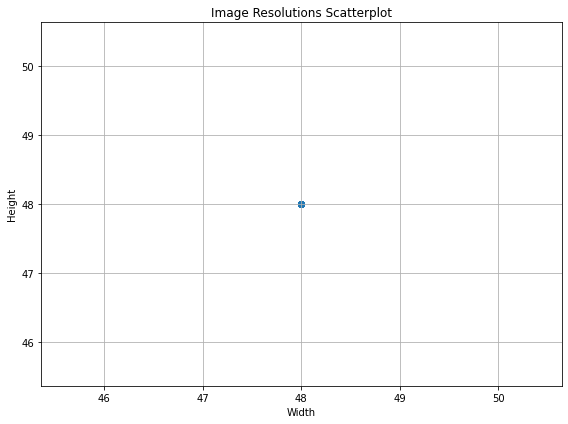

In [2]:
#Creates scatter plot of all images reolutions.

import os
from PIL import Image
import matplotlib.pyplot as plt

def get_image_resolutions(root_folder):
    resolutions = []

    for folder_name, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                file_path = os.path.join(folder_name, file)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        resolutions.append((width, height))
                except (IOError, OSError, Image.DecompressionBombError):
                    # Skip files that PIL can't open or process
                    pass

    return resolutions

# Provide the root folder path where you want to search for images
root_folder_path = r'C:\Important Files\Python Projects\Facial Emotion Recognition\FER-2013\dataset'
image_resolutions = get_image_resolutions(root_folder_path)

if image_resolutions:
    widths, heights = zip(*image_resolutions)

    plt.figure(figsize=(8, 6))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Image Resolutions Scatterplot')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.tight_layout()

    plt.show()
else:
    print("No images found in the specified folders.")


In [3]:
#Finds the average resolution of all images.

import os
from PIL import Image

def calculate_average_resolution(root_folder):
    total_width = 0
    total_height = 0
    count = 0

    for folder_name, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                file_path = os.path.join(folder_name, file)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                        count += 1
                except (IOError, OSError, Image.DecompressionBombError):
                    # Skip files that PIL can't open or process
                    pass

    if count == 0:
        return 0, 0  # Return 0 for width and height if no images are found
    else:
        average_width = total_width / count
        average_height = total_height / count
        return average_width, average_height

# Provide the root folder path where you want to search for images
root_folder_path = r'C:\Important Files\Python Projects\Facial Emotion Recognition\FER-2013\dataset'
average_width, average_height = calculate_average_resolution(root_folder_path)

if average_width == 0 and average_height == 0:
    print("No images found in the specified folders.")
else:
    print(f"Average resolution of images:")
    print(f"Average Width: {average_width:.2f}")
    print(f"Average Height: {average_height:.2f}")


Average resolution of images:
Average Width: 48.00
Average Height: 48.00


In [4]:
#Finds the number of images between 64x64 and 128x128 resolution.
import os
from PIL import Image

def count_images_between_resolution(root_folder, min_width, min_height, max_width, max_height):
    count_between_64x64_and_128x128 = 0

    for folder_name, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                file_path = os.path.join(folder_name, file)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        if min_width <= width <= max_width and min_height <= height <= max_height:
                            count_between_64x64_and_128x128 += 1
                except (IOError, OSError, Image.DecompressionBombError):
                    # Skip files that PIL can't open or process
                    pass

    return count_between_64x64_and_128x128

# Provide the root folder path where you want to search for images
root_folder_path = r'C:\Important Files\Python Projects\Facial Emotion Recognition\FER-2013\dataset'
count_images = count_images_between_resolution(root_folder_path, 64, 64, 128, 128)

print(f"Count of images between 64x64 and 128x128 resolution: {count_images}")

Count of images between 64x64 and 128x128 resolution: 0
